<a href="https://colab.research.google.com/github/HowardHNguyen/EDA/blob/main/EDA_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will work with two datasets in this section: The National Longitudinal Survey of Youth for 1997, a survey conducted by the United States government that surveyed the same group of individuals from 1997 through 2023; and the counts of COVID-19 cases and deaths by country from Our World in Data.

**Data note**

The NLS of Youth was conducted by the United States Bureau of Labor Statistics. This survey started with a cohort of individuals in 1997 who were born between 1980 and 1985, with annual follow-ups each year through to 2023. For this recipe, I pulled 89 variables on grades, employment, income, and attitudes toward government from the hundreds of data items in the survey. Separate files for SPSS, Stata, and SAS can be downloaded from the repository. The NLS data can be downloaded from https://www.nlsinfo.org. You must create an investigator account to download the data, but there is no charge.

Our World in Data provides COVID-19 public use data at https://ourworldindata.org/covid-cases. The dataset includes total cases and deaths, tests administered, hospital beds, and demographic data such as median age, gross domestic product, and a human development index, which is a composite measure of standard of living, educational levels, and life expectancy. The dataset used in this recipe was downloaded on March 3, 2024

## Preparing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import pandas, matplotlib, and statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
landtemps = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/5. Visualization/data/landtemps2023avgs.csv")
covidtotals = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/5. Visualization/data/covidtotals.csv", parse_dates=["lastdate"])
covidtotals.set_index("iso_code", inplace=True)

In [4]:
landtemps.head().T

,0,1,2,3,4
locationid,AE000041196,AEM00041194,AEM00041217,AEM00041218,AG000060390
station,SHARJAH_INTER_AIRP,DUBAI_INTL,ABU_DHABI_INTL,AL_AIN_INTL,ALGER_DAR_EL_BEIDA
countryid,AE,AE,AE,AE,AG
country,United Arab Emirates,United Arab Emirates,United Arab Emirates,United Arab Emirates,Algeria
latabs,25,25,24,24,37
elevation,34,10,27,265,24
avgtemp,29,30,26,30,19


In [3]:
# show some of the temperature rows
landtemps[['station','country','latabs',
  'elevation','avgtemp']].sample(10, random_state=1)

,station,country,latabs,elevation,avgtemp
11924,WOLF_POINT_29_ENE,United States,48,636,6
10671,LITTLE_GRASSY,United States,37,"1,859",10
10278,FLOWERY_TRAIL_WASHINGTON,United States,48,792,8
8436,ROCKSPRINGS,United States,30,726,20
1715,PETERBOROUGH,Canada,44,191,8
5650,TRACY_PUMPING_PLT,United States,38,19,18
335,NEPTUNE_ISLAND,Australia,35,32,16
372,EUDUNDA,Australia,34,415,16
2987,KOZHIKODE,India,11,5,30
7588,TRYON,United States,35,366,16


In [6]:
# generate some descriptive statistics on the temperatures data
landtemps.describe()

,latabs,elevation,avgtemp
count,"12,137","12,137","12,137"
mean,40,598,12
std,13,775,8
min,0,-350,-57
25%,35,78,6
50%,41,271,11
75%,47,824,17
max,90,"9,999",34


In [7]:
landtemps.avgtemp.skew()

-0.3856060165979757

In [8]:
landtemps.avgtemp.kurtosis()

2.7939884544586033

## Histograms

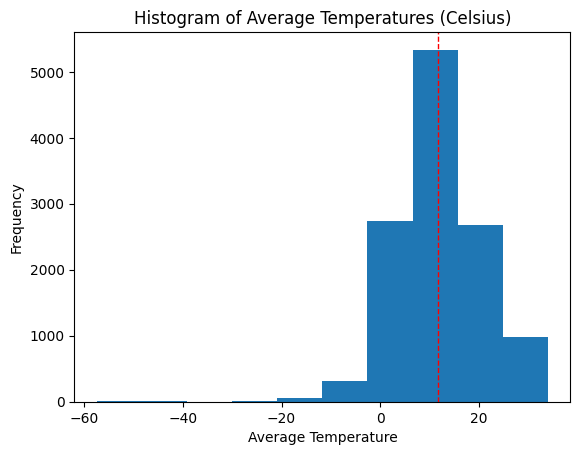

In [9]:
# plot temperature averages
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

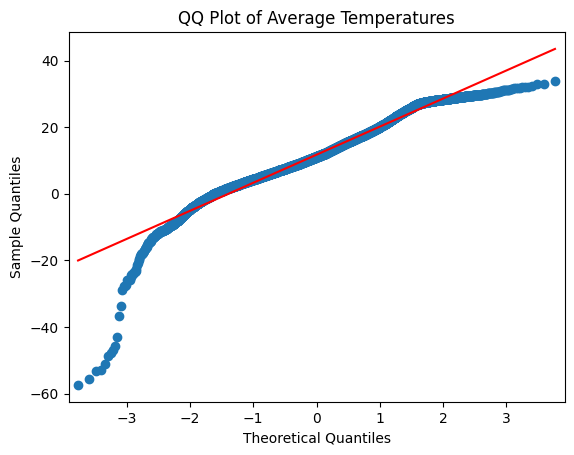

In [10]:
# run a qq-plot to examine where the distribution deviates from a normal distribution
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']), line='s')
plt.title("QQ Plot of Average Temperatures")
plt.show()

In [11]:
# show skewness and kurtosis for total_cases_pm
covidtotals.total_cases_pm.skew()
covidtotals.total_cases_pm.kurtosis()

-0.4280595203351645

In [12]:
# do a stacked histogram
showregions = ['Oceania / Aus','East Asia','Southern Africa','Western Europe']

In [13]:
def getcases(regiondesc):
  return covidtotals.loc[covidtotals.region==regiondesc,'total_cases_pm']

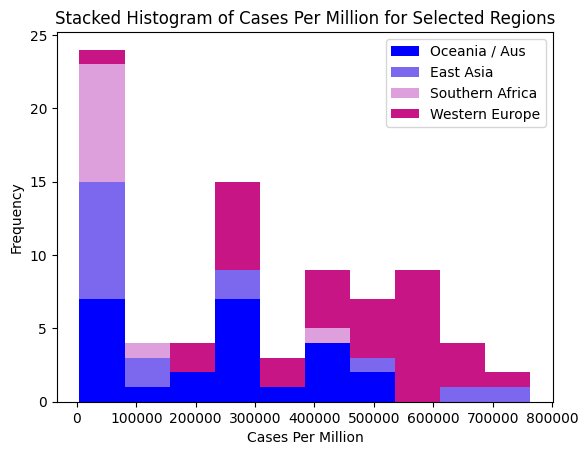

In [14]:
plt.hist([getcases(k) for k in showregions],\
  color=['blue','mediumslateblue','plum','mediumvioletred'],\
  label=showregions, stacked=True)
plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.legend()
plt.show()

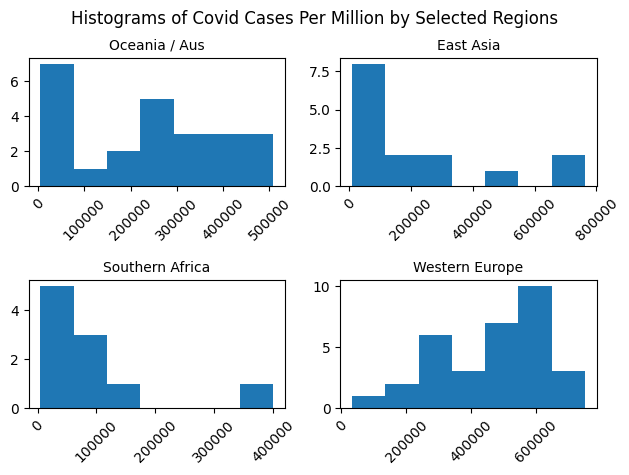

In [17]:
# show multiple histograms on one figure
fig, axes = plt.subplots(2, 2)
fig.suptitle("Histograms of Covid Cases Per Million by Selected Regions")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].\
    total_cases_pm, bins=7)
  ax.set_title(showregions[j], fontsize=10)
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

## Box plots

In [18]:
# import pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
nls97 = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/5. Visualization/data/nls97f.csv", low_memory=False)
nls97.set_index("personid", inplace=True)
#covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"]) # loaded
#covidtotals.set_index("iso_code", inplace=True) # loaded

In [19]:
# do a boxplot for SAT verbal
nls97.satverbal.describe()

,satverbal
count,"1,406"
mean,500
std,112
min,14
25%,430
50%,500
75%,570
max,800


<ipython-input-20-fda890b5f706>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])


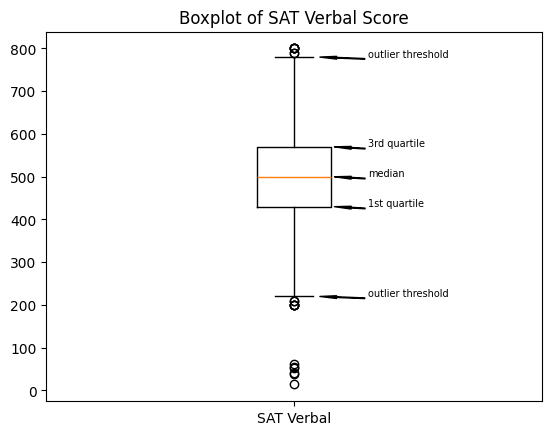

In [20]:
plt.boxplot(nls97.satverbal.dropna(), labels=['SAT Verbal'])
plt.annotate('outlier threshold', xy=(1.05,780), xytext=(1.15,780), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('3rd quartile', xy=(1.08,570), xytext=(1.15,570), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('median', xy=(1.08,500), xytext=(1.15,500), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('1st quartile', xy=(1.08,430), xytext=(1.15,430), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.annotate('outlier threshold', xy=(1.05,220), xytext=(1.15,220), size=7, arrowprops=dict(facecolor='black', headwidth=2, width=0.5, shrink=0.02))
plt.title("Boxplot of SAT Verbal Score")
plt.show()

In [21]:
# show some descriptives on weeks worked
weeksworked = nls97.loc[:, ['highestdegree','weeksworked20','weeksworked21']]
weeksworked.describe()

,weeksworked20,weeksworked21
count,"6,971","6,627"
mean,38,36
std,21,18
min,0,0
25%,21,35
50%,52,43
75%,52,50
max,52,52


<ipython-input-22-ea41ed26c6cd>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([weeksworked.weeksworked20.dropna(),


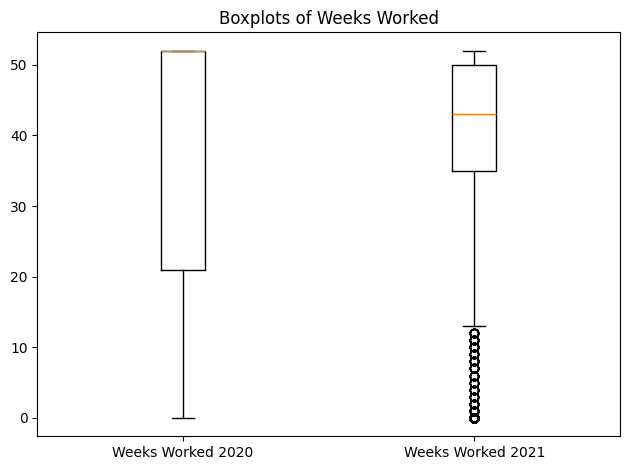

In [22]:
# do a box plot of weeks worked in 2020 and 2021
plt.boxplot([weeksworked.weeksworked20.dropna(),
  weeksworked.weeksworked21.dropna()],
  labels=['Weeks Worked 2020','Weeks Worked 2021'])
plt.title("Boxplots of Weeks Worked")
plt.tight_layout()
plt.show()

In [24]:
# show some descriptives on coronavirus cases
totvars = ['total_cases','total_deaths','total_cases_pm','total_deaths_pm']
totvarslabels = ['cases','deaths','cases per million','deaths per million']
covidtotalsonly = covidtotals[totvars]
covidtotalsonly.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
count,231,231,231,231
mean,"3,351,599","30,214","206,178","1,262"
std,"11,483,212","104,779","203,858","1,315"
min,4,0,354,0
25%,"25,672",178,"21,822",141
50%,"191,496","1,937","133,946",827
75%,"1,294,286","14,150","345,690","1,998"
max,"103,436,829","1,127,152","763,475","6,508"


<ipython-input-25-34fee2183da4>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\


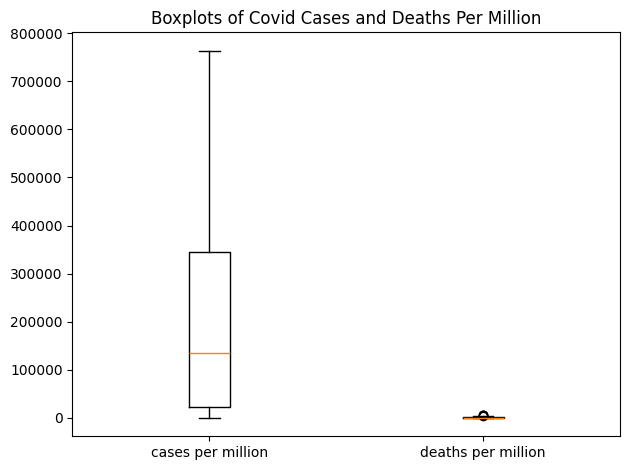

In [25]:
# do a box plot of cases and deaths per million
fig, ax = plt.subplots()
plt.title("Boxplots of Covid Cases and Deaths Per Million")
ax.boxplot([covidtotalsonly.total_cases_pm,covidtotalsonly.total_deaths_pm],\
  labels=['cases per million','deaths per million'])
plt.tight_layout()
plt.show()

<ipython-input-27-89da83a55593>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
<ipython-input-27-89da83a55593>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
<ipython-input-27-89da83a55593>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])
<ipython-input-27-89da83a55593>:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the

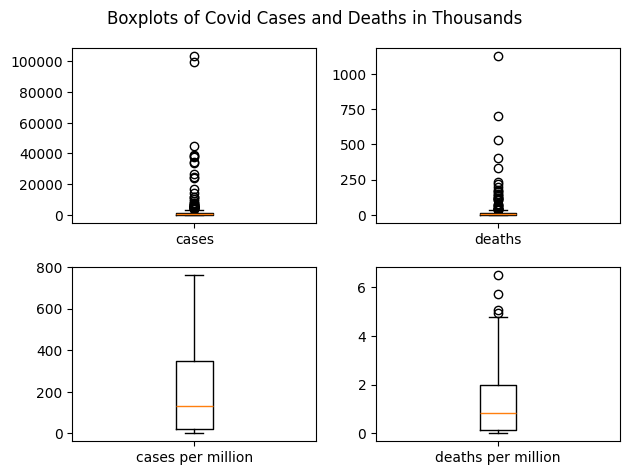

In [27]:
# show boxplots as separate sub plots on one figure
fig, axes = plt.subplots(2, 2)
fig.suptitle("Boxplots of Covid Cases and Deaths in Thousands")
axes = axes.ravel()

for j, ax in enumerate(axes):
  ax.boxplot(covidtotalsonly.iloc[:, j]/1000, labels=[totvarslabels[j]])

plt.tight_layout()
fig.subplots_adjust(top=0.9)
plt.show()

## Grouped Box plots

In [28]:
# import pandas, matplotlib, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 72)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.1f}'.format
pd.set_option('mode.use_inf_as_na', False)
#nls97 = pd.read_csv("data/nls97f.csv", low_memory=False)
#nls97.set_index("personid", inplace=True)
#covidtotals = pd.read_csv("data/covidtotals.csv", parse_dates=["lastdate"])

<ipython-input-28-2bbc8272b32e>:9: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', False)


In [29]:
# view some descriptive statistics
def gettots(x):
  out = {}
  out['min'] = x.min()
  out['qr1'] = x.quantile(0.25)
  out['med'] = x.median()
  out['qr3'] = x.quantile(0.75)
  out['max'] = x.max()
  out['count'] = x.count()
  return pd.Series(out)

In [31]:
nls97.columns

Index(['gender', 'birthmonth', 'birthyear', 'sampletype', 'ethnicity',
       'highestgradecompleted', 'maritalstatus', 'childathome',
       'childnotathome', 'weeklyhrscomputer',
       ...
       'colenroct18', 'colenrfeb19', 'colenroct19', 'colenrfeb20',
       'colenroct20', 'colenrfeb21', 'colenroct21', 'colenrfeb22',
       'colenroct22', 'originalid'],
      dtype='object', length=106)

In [30]:
nls97.groupby(['highestdegree'])['weeksworked21'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
highestdegree,,,,,,
0. None,0.0,0.0,39.0,49.0,52.0,487.0
1. GED,0.0,7.0,42.0,50.0,52.0,853.0
2. High School,0.0,27.0,42.0,50.0,52.0,"2,529.0"
3. Associates,0.0,38.0,43.0,49.0,52.0,614.0
4. Bachelors,0.0,40.0,43.0,50.0,52.0,"1,344.0"
5. Masters,0.0,41.0,45.0,52.0,52.0,614.0
6. PhD,0.0,41.0,44.0,49.0,52.0,59.0
7. Professional,0.0,41.0,45.0,51.0,52.0,105.0


<ipython-input-32-0e079508e4c7>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')


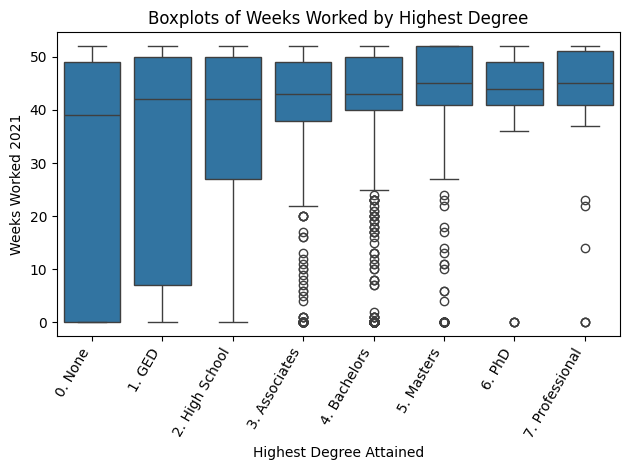

In [32]:
# do boxplots for weeks worked by highest degree earned
myplt = sns.boxplot(x='highestdegree',y='weeksworked21',
  data=nls97,
  order=sorted(nls97.highestdegree.dropna().unique()))
myplt.set_title("Boxplots of Weeks Worked by Highest Degree")
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2021')
myplt.set_xticklabels(myplt.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [33]:
# view minimum, maximum, median, and first and third quartile values
covidtotals.groupby(['region'])['total_cases_pm'].apply(gettots).unstack()

,min,qr1,med,qr3,max,count
region,,,,,,
Caribbean,"2,978.8","128,448.3","237,966.3","390,757.6","626,793.1",26.0
Central Africa,434.3,"2,888.2","4,231.8","9,948.2","29,613.9",11.0
Central America,"2,319.4","38,585.1","70,069.8","206,305.6","237,539.5",7.0
Central Asia,"1,787.0","7,145.9","45,454.1","79,794.9","162,355.9",6.0
East Africa,659.9,"2,018.4","4,061.6","71,435.4","507,765.4",15.0
East Asia,"8,294.7","26,929.8","69,661.4","285,172.6","763,475.4",15.0
Eastern Europe,"104,251.9","166,930.3","223,685.2","459,646.0","760,161.5",21.0
North Africa,"4,649.3","6,057.7","34,140.8","74,463.2","93,343.3",5.0
North America,"60,412.2","108,217.8","214,958.5","374,862.4","582,158.0",4.0


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


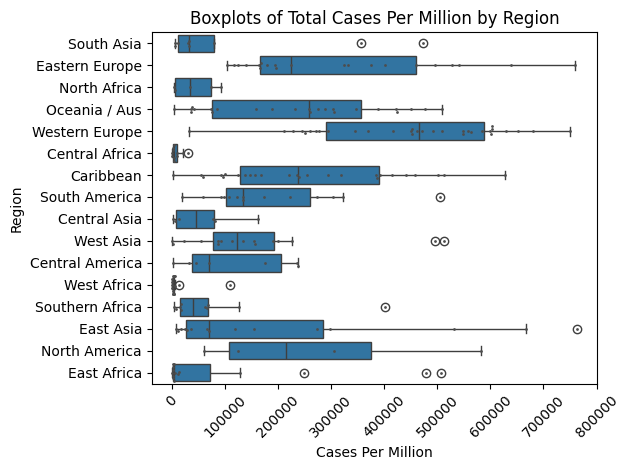

In [34]:
# do boxplots for cases per million by region
covidtotals.total_cases_pm.describe()
covidtotals.region.value_counts(dropna=False)
sns.boxplot(x='total_cases_pm', y='region', data=covidtotals)
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals, size=2, color=".3", linewidth=0)
plt.title("Boxplots of Total Cases Per Million by Region")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
covidtotals.total_cases_pm.describe()

,total_cases_pm
count,231.0
mean,"206,177.8"
std,"203,858.1"
min,354.5
25%,"21,821.9"
50%,"133,946.3"
75%,"345,689.8"
max,"763,475.4"


In [36]:
highvalue = covidtotals.total_cases_pm.quantile(0.9)
highvalue

512388.401

In [37]:
# show the most extreme value for covid totals
covidtotals.loc[covidtotals.total_cases_pm>=highvalue,['location','total_cases_pm']]

,location,total_cases_pm
iso_code,,
AND,Andorra,"601,367.7"
AUT,Austria,"680,262.6"
BRN,Brunei,"763,475.4"
CYP,Cyprus,"760,161.5"
DNK,Denmark,"583,624.9"
FRO,Faeroe Islands,"652,484.1"
FRA,France,"603,427.6"
GIB,Gibraltar,"628,882.7"
GRC,Greece,"540,380.1"


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 20.0% of the points cannot be plac

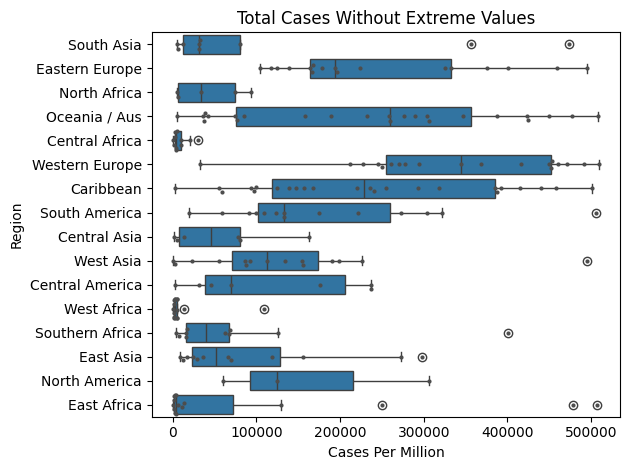

In [38]:
# do the same boxplots without the one extreme value in West Asia
sns.boxplot(x='total_cases_pm', y='region', data=covidtotals.loc[covidtotals.total_cases_pm<highvalue])
sns.swarmplot(y="region", x="total_cases_pm", data=covidtotals.loc[covidtotals.total_cases_pm<highvalue], size=3, color=".3", linewidth=0)
plt.title("Total Cases Without Extreme Values")
plt.xlabel("Cases Per Million")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

## Scatter plots

In [39]:
# import pandas, matplotlib, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
#landtemps = pd.read_csv("data/landtemps2023avgs.csv")

In [41]:
landtemps.columns

Index(['locationid', 'station', 'countryid',
       'country', 'latabs', 'elevation', 'avgtemp'],
      dtype='object')

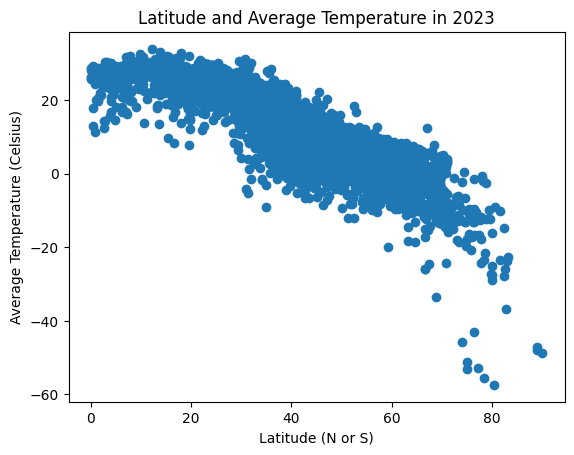

In [40]:
# run a scatter plot latitude by avgtemp
plt.scatter(x="latabs", y="avgtemp", data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2023")
plt.show()

In [42]:
landtemps.shape

(12137, 7)

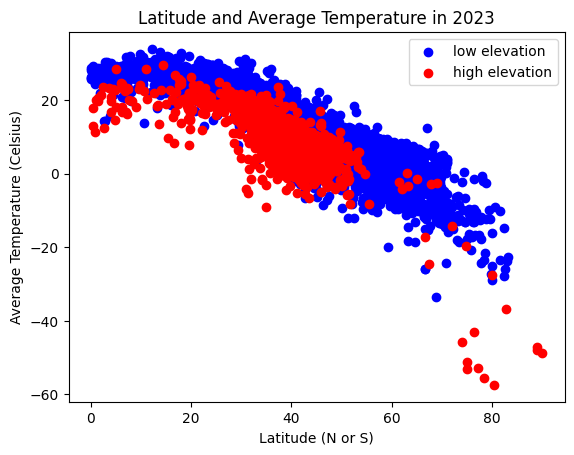

In [43]:
# show the high elevation points in a different color
low, high = landtemps.loc[landtemps.elevation<=1000], landtemps.loc[landtemps.elevation>1000]
plt.scatter(x="latabs", y="avgtemp", c="blue", data=low)
plt.scatter(x="latabs", y="avgtemp", c="red", data=high)
plt.legend(('low elevation', 'high elevation'))
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature (Celsius)")
plt.title("Latitude and Average Temperature in 2023")
plt.show()

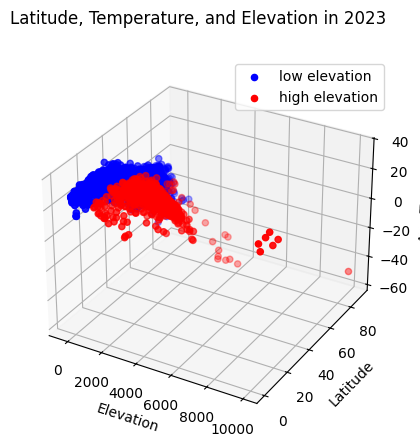

In [44]:
# show this as a 3D plot
fig = plt.figure()
plt.suptitle("Latitude, Temperature, and Elevation in 2023")
ax = plt.axes(projection='3d')
ax.set_xlabel("Elevation")
ax.set_ylabel("Latitude")
ax.set_zlabel("Avg Temp")
ax.scatter3D(low.elevation, low.latabs, low.avgtemp, label="low elevation", c="blue")
ax.scatter3D(high.elevation, high.latabs, high.avgtemp, label="high elevation", c="red")
ax.legend()
plt.show()

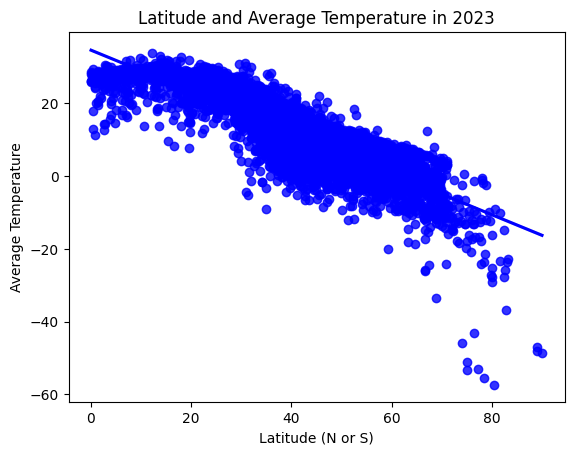

In [45]:
# show scatter plot with a regression line
sns.regplot(x="latabs", y="avgtemp", color="blue", data=landtemps)
plt.title("Latitude and Average Temperature in 2023")
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.show()

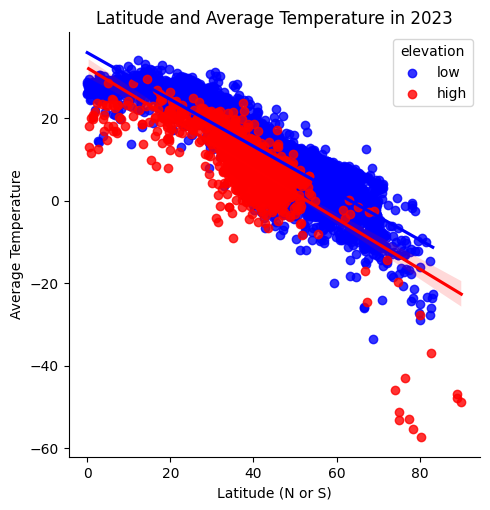

In [46]:
# show scatter plot with different regression lines by elevation group
landtemps['elevation'] = np.where(landtemps.elevation<=1000,'low','high')
sns.lmplot(x="latabs", y="avgtemp", hue="elevation", palette=dict(low="blue", high="red"),  facet_kws=dict(legend_out=False), data=landtemps)
plt.xlabel("Latitude (N or S)")
plt.ylabel("Average Temperature")
plt.yticks(np.arange(-60, 40, step=20))
plt.title("Latitude and Average Temperature in 2023")
plt.show()

In [52]:
# check some average temperatures above the regression lines
high.loc[(high.latabs>38) & (high.avgtemp>=18),
  ['station','country','latabs','elevation','avgtemp']]
#low.loc[(low.latabs>47) & (low.avgtemp>=14),
#  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
82,YEREVAN,Armenia,40,"1,113",19
3968,LAJES_AB,Portugal,39,"1,016",19


In [53]:
low.loc[(low.latabs>47) & (low.avgtemp>=14),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1026,COURTENAY_PUNTLEDGE,Canada,50,40,16
1055,HOWE_SOUNDPAM_ROCKS,Canada,49,5,14
1318,FORESTBURG_PLANT_SITE,Canada,52,663,18
2573,POINTE_DU_TALUT,France,47,43,14
2574,NANTES_ATLANTIQUE,France,47,27,14
4449,USTORDYNSKIJ,Russia,53,526,17
6810,WALKER_AH_GWAH_CHING,United States,47,430,20
7050,MEDICINE_LAKE_3_SE,United States,48,592,16
8736,QUINCY,United States,47,392,14
9914,WINDIGO_MICHIGAN,United States,48,213,16


In [56]:
# check some average temperatures below the regression lines
high.loc[(high.latabs<5) & (high.avgtemp<18),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
2239,BOGOTA_ELDORADO,Colombia,5,"2,548",15
2262,SAN_LUIS,Colombia,1,"2,976",11
2293,IZOBAMBA,Ecuador,0,"3,058",13
2295,CANAR,Ecuador,3,"3,083",13
2296,LOJA_LA_ARGELIA,Ecuador,4,"2,160",17
3298,ELDORET_INTL,Kenya,0,"2,116",18


In [61]:
low.loc[(low.latabs<70) & (low.avgtemp<-20),
  ['station','country','latabs','elevation','avgtemp']]

,station,country,latabs,elevation,avgtemp
1251,SHEPHERD_BAY_A,Canada,69,43,-34
1264,CAPE_DYER,Canada,67,725,-26
1265,CAPE_DYER_A,Canada,67,393,-26


## Line plots

In [62]:
# import pandas, numpy, and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
pd.set_option('display.width', 72)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.0f}'.format
coviddaily = pd.read_csv("/content/drive/MyDrive/_Python/Python-Data-Cleaning/5. Visualization/data/coviddaily.csv", parse_dates=["casedate"])

In [63]:
# look at a couple of sample rows of the covid daily data
coviddaily.sample(2, random_state=1).T

,628,26980
iso_code,AND,PRT
casedate,2020-03-15 00:00:00,2022-12-04 00:00:00
location,Andorra,Portugal
continent,Europe,Europe
new_cases,1,"3,963"
new_deaths,0,69
population,79843,10270857
pop_density,164,112
median_age,NaN,46
gdp_per_capita,NaN,"27,937"


In [64]:
# calculate new cases and deaths by day
coviddailytotals = coviddaily.loc[coviddaily.casedate.between('2023-07-01','2024-03-03')].\
  groupby(['casedate'])[['new_cases','new_deaths']].sum().reset_index()

coviddailytotals.sample(7, random_state=1)

,casedate,new_cases,new_deaths
27,2024-01-07,"181,487","1,353"
3,2023-07-23,"254,984",596
22,2023-12-03,"282,319","1,535"
18,2023-11-05,"158,346","1,162"
23,2023-12-10,"333,155","1,658"
17,2023-10-29,"144,325",905
21,2023-11-26,"238,282","1,287"


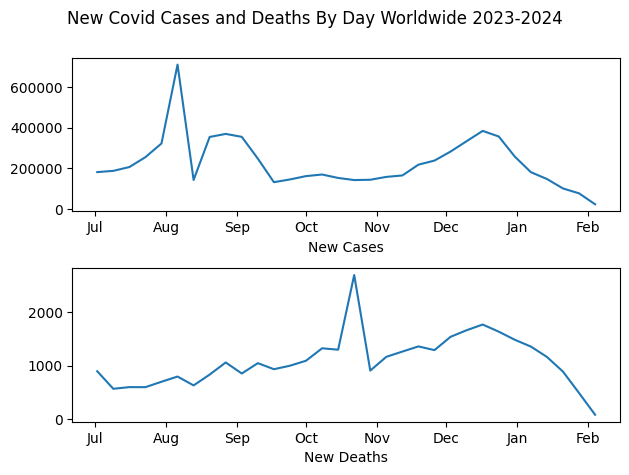

In [65]:
# show line charts for new cases and new deaths by day
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide 2023-2024")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [66]:
# calculate new cases and new deaths by region and day
regiontotals = coviddaily.loc[coviddaily.casedate.between('2023-07-01','2024-03-03')].\
  groupby(['casedate','region'])[['new_cases','new_deaths']].sum().reset_index()

regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
110,2023-08-13,West Asia,"2,313",25
147,2023-09-03,Central Asia,600,7
494,2024-02-04,Oceania / Aus,"12,594",38
325,2023-11-19,East Asia,"20,088",15
189,2023-09-17,West Africa,85,0
218,2023-10-01,South America,"4,203",54
469,2024-01-21,Oceania / Aus,"17,503",129


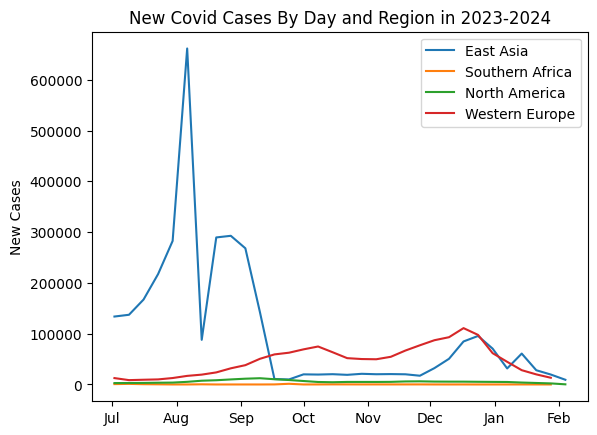

In [67]:
# show plot of new cases by selected regions
showregions = ['East Asia','Southern Africa','North America','Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.region==showregions[j],
    ['casedate','new_cases']]
  plt.plot(rt.casedate, rt.new_cases, label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2023-2024")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

In [68]:
sa = coviddaily.loc[(coviddaily.casedate.between('2023-01-01','2023-10-31')) & \
    (coviddaily.region=='South America'),['casedate','new_cases']].\
  groupby(['casedate'])[['new_cases']].sum().reset_index().rename(columns={'new_cases':'sacases'})

In [69]:
br = coviddaily.loc[(coviddaily.location=='Brazil') & \
  (coviddaily.casedate.between('2023-01-01','2023-10-31')),['casedate','new_cases']].rename(columns={'new_cases':'brcases'})

In [70]:
sa = pd.merge(sa, br, left_on=['casedate'], right_on=['casedate'], how="left")
sa.fillna({"sacases": 0}, inplace=True)
sa['sacasesnobr'] = sa.sacases-sa.brcases
#saabb = sa.loc[sa.casedate.between('2023-01-01','2023-10-01')]

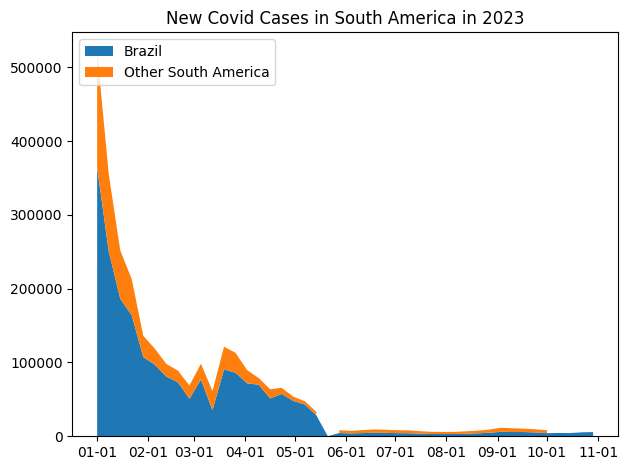

In [71]:
fig = plt.figure()
ax = plt.subplot()
ax.stackplot(sa.casedate, sa.sacases, sa.sacasesnobr, labels=['Brazil','Other South America'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in South America in 2023")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()

## Heat map

In [72]:
# import pandas, numpy, and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 53)
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

In [73]:
# generate a correlation matrix
corr = covidtotals.corr(numeric_only=True)
corr[['total_cases','total_deaths','total_cases_pm','total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.00,0.76,0.10,0.15
total_deaths,0.76,1.00,0.01,0.27
total_cases_pm,0.10,0.01,1.00,0.44
total_deaths_pm,0.15,0.27,0.44,1.00
population,0.70,0.47,-0.13,-0.07
pop_density,-0.03,-0.04,0.19,0.02
median_age,0.29,0.19,0.74,0.69
gdp_per_capita,0.19,0.13,0.66,0.29
hosp_beds,0.21,0.05,0.48,0.39
vac_per_hund,0.02,-0.07,0.24,-0.07


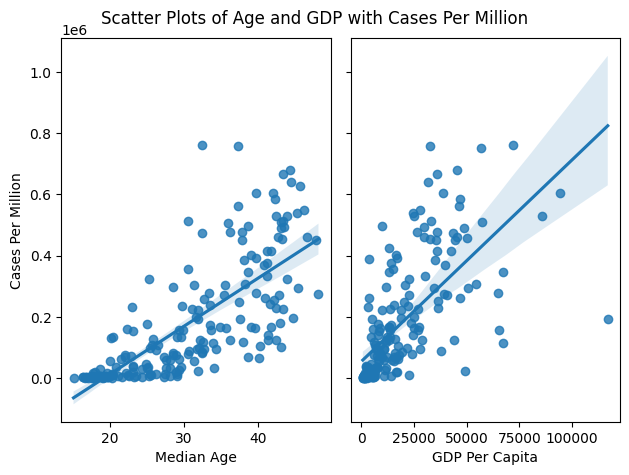

In [74]:
# show scatter plots
fig, axes = plt.subplots(1,2, sharey=True)
sns.regplot(x="median_age", y="total_cases_pm", data=covidtotals, ax=axes[0])
sns.regplot(x="gdp_per_capita", y="total_cases_pm", data=covidtotals, ax=axes[1])
axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

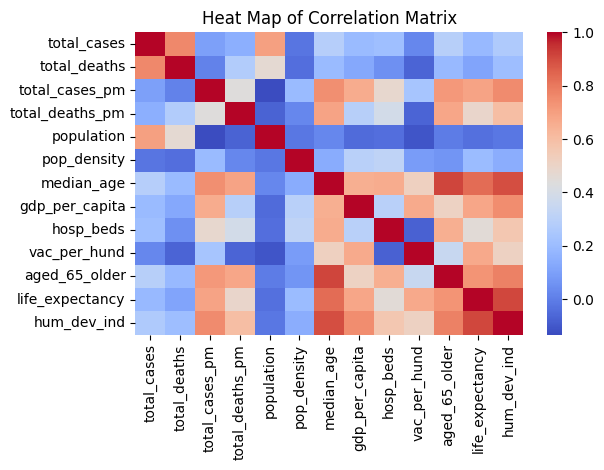

In [75]:
# generate a heat map
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()